## Face and Facial Keypoint detection

After you've trained a neural network to detect facial keypoints, you can then apply this network to *any* image that includes faces. The neural network expects a Tensor of a certain size as input and, so, to detect any face, you'll first have to do some pre-processing.

1. Detect all the faces in an image using a face detector (we'll be using a Haar Cascade detector in this notebook).
2. Pre-process those face images so that they are grayscale, and transformed to a Tensor of the input size that your net expects. This step will be similar to the `data_transform` you created and applied in Notebook 2, whose job was tp rescale, normalize, and turn any iimage into a Tensor to be accepted as input to your CNN.
3. Use your trained model to detect facial keypoints on the image.

---

In the next python cell we load in required libraries for this section of the project.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline


#### Select an image 

Select an image to perform facial keypoint detection on; you can select any image of faces in the `images/` directory.

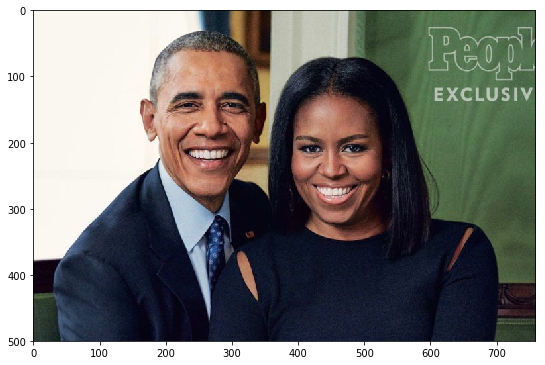

In [2]:
import cv2
# load in color image for face detection
image = cv2.imread('images/obamas.jpg')

# switch red and blue color channels 
# --> by default OpenCV assumes BLUE comes first, not RED as in many images
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# plot the image
fig = plt.figure(figsize=(9,9))
plt.imshow(image)

## Detect all faces in an image

Next, you'll use one of OpenCV's pre-trained Haar Cascade classifiers, all of which can be found in the `detector_architectures/` directory, to find any faces in your selected image.

In the code below, we loop over each face in the original image and draw a red square on each face (in a copy of the original image, so as not to modify the original). You can even [add eye detections](https://docs.opencv.org/3.4.1/d7/d8b/tutorial_py_face_detection.html) as an *optional* exercise in using Haar detectors.

An example of face detection on a variety of images is shown below.

<img src='images/haar_cascade_ex.png' width=80% height=80%/>


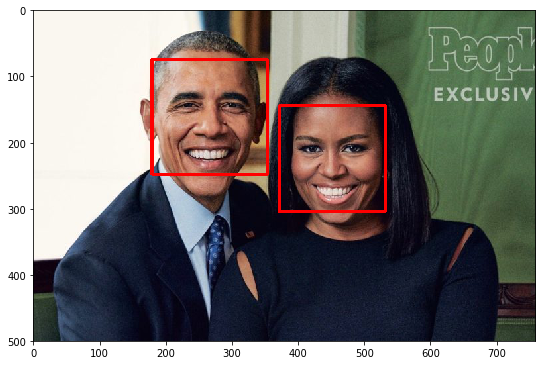

In [3]:
# load in a haar cascade classifier for detecting frontal faces
face_cascade = cv2.CascadeClassifier('detector_architectures/haarcascade_frontalface_default.xml')

# run the detector
# the output here is an array of detections; the corners of each detection box
# if necessary, modify these parameters until you successfully identify every face in a given image
faces = face_cascade.detectMultiScale(image, 1.2, 2)

# make a copy of the original image to plot detections on
image_with_detections = image.copy()

# loop over the detected faces, mark the image where each face is found
for (x,y,w,h) in faces:
    # draw a rectangle around each detected face
    # you may also need to change the width of the rectangle drawn depending on image resolution
    cv2.rectangle(image_with_detections,(x,y),(x+w,y+h),(255,0,0),3) 

fig = plt.figure(figsize=(9,9))

plt.imshow(image_with_detections)

## Loading in a trained model

Once you have an image to work with (and, again, you can select any image of faces in the `images/` directory), the next step is to pre-process that image and feed it into your CNN facial keypoint detector.

First, load your best model by its filename.

In [4]:
import torch
from models import Net

net = Net()

## TODO: load the best saved model parameters (by your path name)
## You'll need to un-comment the line below and add the correct name for *your* saved model
# net.load_state_dict(torch.load('saved_models/keypoints_model_1.pt'))
model_dir = 'saved_models/'
model_name = 'keypoints_model_v2_MSE20epoch.pt'
net.load_state_dict(torch.load(model_dir+model_name))
## print out your net and prepare it for testing (uncomment the line below)
net.eval()

Net(
  (conv1): Conv2d(1, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv4): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv_drop): Dropout(p=0.1, inplace=False)
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1_drop): Dropout(p=0.4, inplace=False)
  (fc1): Linear(in_features=12544, out_features=500, bias=True)
  (fc2): Linear(in_features=500, out_features=136, bias=True)
)

## Keypoint detection

Now, we'll loop over each detected face in an image (again!) only this time, you'll transform those faces in Tensors that your CNN can accept as input images.

### TODO: Transform each detected face into an input Tensor

You'll need to perform the following steps for each detected face:
1. Convert the face from RGB to grayscale
2. Normalize the grayscale image so that its color range falls in [0,1] instead of [0,255]
3. Rescale the detected face to be the expected square size for your CNN (224x224, suggested)
4. Reshape the numpy image into a torch image.

You may find it useful to consult to transformation code in `data_load.py` to help you perform these processing steps.


### TODO: Detect and display the predicted keypoints

After each face has been appropriately converted into an input Tensor for your network to see as input, you'll wrap that Tensor in a Variable() and can apply your `net` to each face. The ouput should be the predicted the facial keypoints. These keypoints will need to be "un-normalized" for display, and you may find it helpful to write a helper function like `show_keypoints`. You should end up with an image like the following with facial keypoints that closely match the facial features on each individual face:

<img src='images/michelle_detected.png' width=30% height=30%/>




# observation/discussion:
#### It is a shame that the transforms we defined in Notebook 1 ( `data_load.py`) such as Rescale, RandomCrop, Normalize, ToTensor cannot be used. The whole idea of having "dataloader" , and **Standard transformation** was to avoid boiler plate code for standarizing pre-processing; 
Now, duplicating the same code logic  for pre-processing(transforms) is **source of potential error** in software development. I would have preferred using functions for these tranformations in training so that they could be reused!

### Keypoints to note
- face detected by haarcascade mostly excludes(crops out) jawline; 
-- hence, we use delta=50 to include jawline; Making the test image appearance similar to train image
- Using print command to print shape is helpful to debugging errors
- Keypoints ar predicted on image of size224x224; Hence it is import to use the same image for displaying keypoint overlay
- Haar based facedetection isn't robust; There might be false positives! Need to tune face detection params!


no of faces:  2
shape roi:  (274, 274, 3)
shape after adding new third  channel:  (1, 1, 224, 224)
shape of output_pts  (68, 2)
shape roi:  (260, 260, 3)
shape after adding new third  channel:  (1, 1, 224, 224)
shape of output_pts  (68, 2)


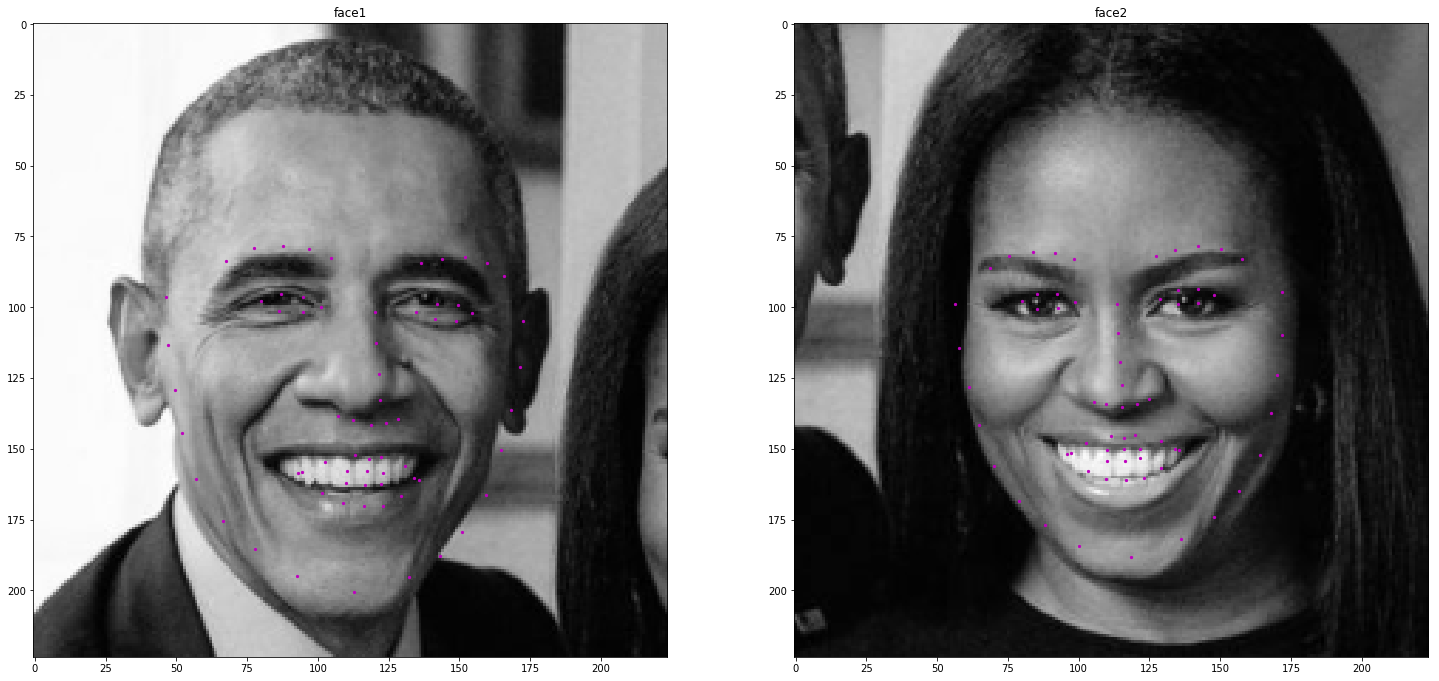

In [5]:
def detect_visulize_keypts(image, faces, delta =50):
    image_copy = np.copy(image)
    
    # we will create subplots for each face
    fig = plt.figure(figsize=(25, 20))
    
    # index to count no of faces for each subplot addition
    index =0
    nfaces = len(faces)
    print("no of faces: ", nfaces)
    
    # loop over the detected faces from your haar cascade
    for (x,y,w,h) in faces:

        # Select the region of interest that is the face in the image 
        #roi = image_copy[y:y+h, x:x+w]
        delta = 50
        roi = image_copy[y-delta:y+h+delta, x-delta:x+w+delta]
        print("shape roi: ", roi.shape)
        ## TODO: Convert the face region from RGB to grayscale
        roi = cv2.cvtColor(roi, cv2.COLOR_RGB2GRAY)

        ## TODO: Normalize the grayscale image so that its color range falls in [0,1] instead of [0,255]
        roi = roi/ 255.0

        ## TODO: Rescale the detected face to be the expected square size for your CNN (224x224, suggested)
        roi_resized = cv2.resize(roi, (224, 224))
        ## Use this iamge "roi_resized" to overlay the detected key_points
        
        #print("shape after resize: ", roi_resized.shape)

        ##[[]]
        # add that third color dim and changed into a 4D tensor
        roi_t = roi_resized.reshape(1, 1, roi_resized.shape[0], roi_resized.shape[1])
        print("shape after adding new third  channel: ", roi_t.shape)
        ## TODO: Reshape the numpy image shape (H x W x C) into a torch image shape (C x H x W)
        #roi = np.transpose(roi, (1, 2, 0))   # transpose to go from torch to numpy image
        roi_t = torch.from_numpy(roi_t)
        
        ## TODO: Make facial keypoint predictions using your loaded, trained network 
        ## perform a forward pass to get the predicted facial keypoints
        predicted_key_pts = net(roi_t.float())
        #predicted_key_pts = predicted_key_pts.view(68, 2)
        predicted_key_pts = predicted_key_pts.data.numpy()
        
        # undo normalization of keypoints  
        predicted_key_pts = predicted_key_pts*50.0+100
        predicted_key_pts = predicted_key_pts.reshape(68, 2)
        print("shape of output_pts ", predicted_key_pts.shape)
        
        ## TODO: Display each detected face and the corresponding keypoints 
        ax = fig.add_subplot(1, nfaces, index+1)
        ax.imshow(roi_resized, cmap='gray')
        ax.scatter(predicted_key_pts[:, 0], predicted_key_pts[:, 1], s=20, marker='.', c='m')
        ax.set_title("face"+str(index+1))
        
        #increse the count
        index += 1
        
        #show_all_keypoints(roi_resized, predicted_key_pts)
    # end of for loop for faces
    plt.show()
#end of function
detect_visulize_keypts(image, faces)

no of faces:  6
shape roi:  (465, 465, 3)
shape after adding new third  channel:  (1, 1, 224, 224)
shape of output_pts  (68, 2)
shape roi:  (454, 454, 3)
shape after adding new third  channel:  (1, 1, 224, 224)
shape of output_pts  (68, 2)
shape roi:  (410, 410, 3)
shape after adding new third  channel:  (1, 1, 224, 224)
shape of output_pts  (68, 2)
shape roi:  (440, 440, 3)
shape after adding new third  channel:  (1, 1, 224, 224)
shape of output_pts  (68, 2)
shape roi:  (472, 472, 3)
shape after adding new third  channel:  (1, 1, 224, 224)
shape of output_pts  (68, 2)
shape roi:  (395, 395, 3)
shape after adding new third  channel:  (1, 1, 224, 224)
shape of output_pts  (68, 2)


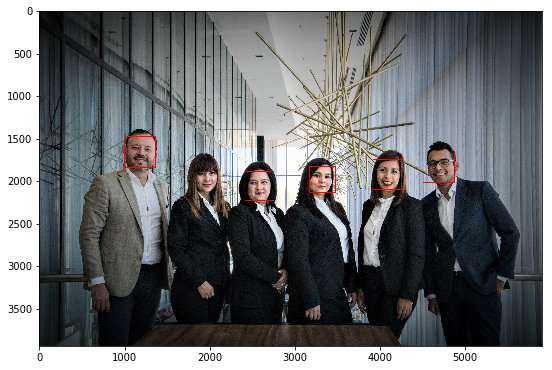

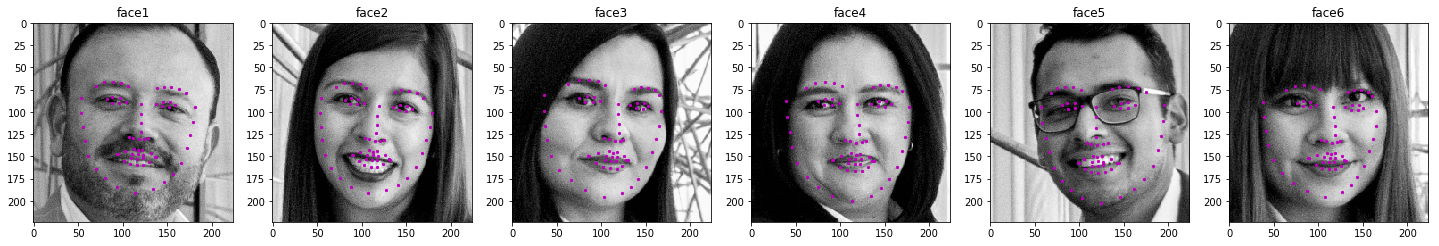

In [6]:
# Now lets load few more images and have fun!

image = cv2.imread('images/team.jpg')
# switch red and blue color channels 
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# face detection isn't good
faces = face_cascade.detectMultiScale(image, 1.3, 7)
# make a copy of the original image to plot detections on
image_with_detections = image.copy()

# loop over the detected faces, mark the image where each face is found
for (x,y,w,h) in faces:
    # draw a rectangle around each detected face
    # you may also need to change the width of the rectangle drawn depending on image resolution
    cv2.rectangle(image_with_detections,(x,y),(x+w,y+h),(255,0,0),5) 

fig = plt.figure(figsize=(9,9))

plt.imshow(image_with_detections)
# run forward pass and detect facila keypoints!
detect_visulize_keypts(image, faces)

no of faces:  7
shape roi:  (247, 247, 3)
shape after adding new third  channel:  (1, 1, 224, 224)
shape of output_pts  (68, 2)
shape roi:  (252, 252, 3)
shape after adding new third  channel:  (1, 1, 224, 224)
shape of output_pts  (68, 2)
shape roi:  (250, 250, 3)
shape after adding new third  channel:  (1, 1, 224, 224)
shape of output_pts  (68, 2)
shape roi:  (215, 215, 3)
shape after adding new third  channel:  (1, 1, 224, 224)
shape of output_pts  (68, 2)
shape roi:  (238, 238, 3)
shape after adding new third  channel:  (1, 1, 224, 224)
shape of output_pts  (68, 2)
shape roi:  (247, 247, 3)
shape after adding new third  channel:  (1, 1, 224, 224)
shape of output_pts  (68, 2)
shape roi:  (234, 234, 3)
shape after adding new third  channel:  (1, 1, 224, 224)
shape of output_pts  (68, 2)


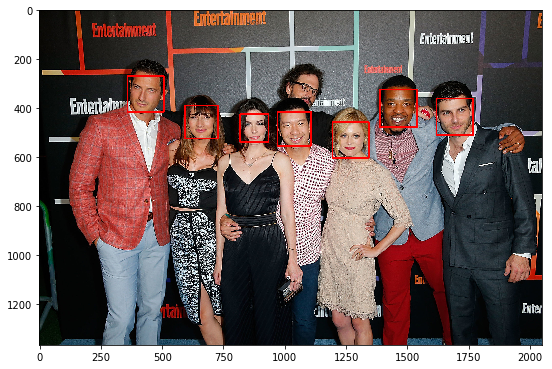

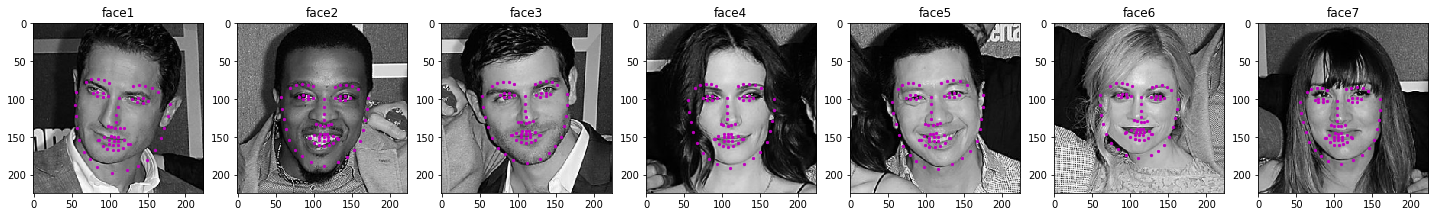

In [7]:
image = cv2.imread('images/test2.jpg')
# switch red and blue color channels 
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# face detection isn't good
faces = face_cascade.detectMultiScale(image, 1.2, 5)
# make a copy of the original image to plot detections on
image_with_detections = image.copy()

# loop over the detected faces, mark the image where each face is found
for (x,y,w,h) in faces:
    # draw a rectangle around each detected face
    # you may also need to change the width of the rectangle drawn depending on image resolution
    cv2.rectangle(image_with_detections,(x,y),(x+w,y+h),(255,0,0),5) 

fig = plt.figure(figsize=(9,9))

plt.imshow(image_with_detections)
# run forward pass and detect facila keypoints!
detect_visulize_keypts(image, faces)

### Observation/discussion
Overall, it was pretty fun in training facial keypoints and testing it on real images. I can see the need to include rotation, or skew transformation to better detect facial keypoint swhen the persons face is skewed. Training on person with beard will also be helpful(see team.jpg result). Also, an end-to-end deeep learning model with both face-detection and facial-keypoint detection would be a next future project!

Happy learning. Happy coding!.